Dans ce projet, nous allons analyser l'évolution du Covid 19 dans le monde Source des données:
Voici quelques questions qui peuvent guider notre analyse

Quels sont les pays avec les plus grand nombres de cas ?
Quels sont les pays avec un taux de mortalité élevé ?
Le confinement a-t-il eu un effet sur le nombre de cas ?
Comparer la situation par continent



**Importer les données**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Pour utiliser les fichiers excel nous installons 

In [ ]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 14.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
df=pd.read_excel('/gdrive/MyDrive/data/datasets/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [ ]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

## Nettoyage des données

In [ ]:
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [ ]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
327,2020-01-12,12,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
328,2020-01-11,11,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
329,2020-01-10,10,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
330,2020-01-09,9,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
331,2020-01-08,8,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
geoId                                                         0
countryterritoryCode                                          0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

**Pays avec le plus grand nombres de cas**

In [ ]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [ ]:
df_by_country=df.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False)
df_by_country

countriesAndTerritories
United_States_of_America       16256754
India                           9884100
Brazil                          6901952
Russia                          2653928
France                          2376852
                                 ...   
Montserrat                            8
Falkland_Islands_(Malvinas)           8
Anguilla                              7
Marshall_Islands                      3
Vanuatu                               0
Name: cases, Length: 211, dtype: int64

In [ ]:
df_by_country

countriesAndTerritories
United_States_of_America       16256754
India                           9884100
Brazil                          6901952
Russia                          2653928
France                          2376852
                                 ...   
Montserrat                            8
Falkland_Islands_(Malvinas)           8
Anguilla                              7
Marshall_Islands                      3
Vanuatu                               0
Name: cases, Length: 211, dtype: int64

**On remarque que avec l'évolution du Covid le pays étant le plus touchés par cette maladie sont les Etats Unis d'Amériques**

**Pays avec plus de mort**

In [ ]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61882,2020-04-07,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61883,2020-04-06,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61884,2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61885,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624


In [ ]:
df_by_country2=df.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False)
df_by_country2

countriesAndTerritories
United_States_of_America       299177
Brazil                         181402
India                          143355
Mexico                         113953
Italy                           64520
                                ...  
Laos                                0
Faroe_Islands                       0
Falkland_Islands_(Malvinas)         0
Timor_Leste                         0
Grenada                             0
Name: deaths, Length: 211, dtype: int64

Text(0, 0.5, 'Number of deaths')

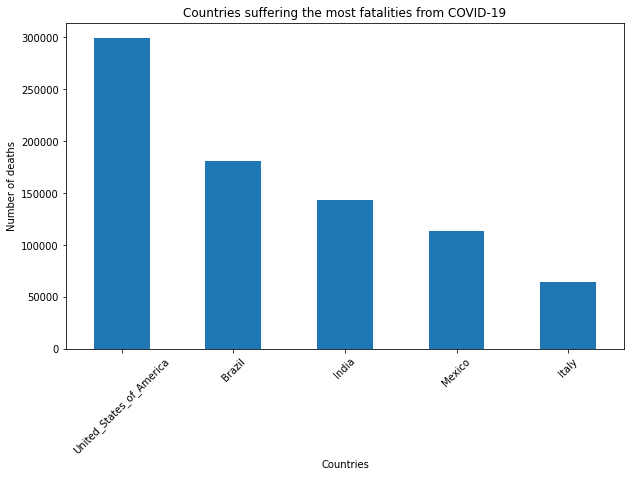

In [ ]:
plt.figure(figsize=(10,6))
ax=df_by_country2.head(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Countries suffering the most fatalities from COVID-19")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of deaths")

**Le pays ayant plus de personnes décédés de cette situation de covid sont les états unis?**

Effet du confinement sur le nombre de cas

In [ ]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61882,2020-04-07,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61883,2020-04-06,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61884,2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61885,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624


Il faudrait observé l'évolution du covid 19 chaque mois par rapport au nombre de cas et de décès pour déduire si le confinement était plus avantageux pour réduire le covid

In [ ]:
df_by_month = df.groupby('month')['cases','deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_by_month

,cases,deaths
month,,
1,9767,212
2,74717,2702
3,714475,35668
4,2338739,189142
5,2891247,140118
6,4249352,134069
7,7065668,166185
8,7958523,178556
9,8452473,162120


In [ ]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61882,2020-04-07,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61883,2020-04-06,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61884,2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
61885,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624


In [ ]:
df_clean  = df.set_index('dateRep')
df_clean

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
2020-04-06,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796


In [ ]:
df_clean_by_month=df_clean.groupby('month')['cases','deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Nombre de morts')

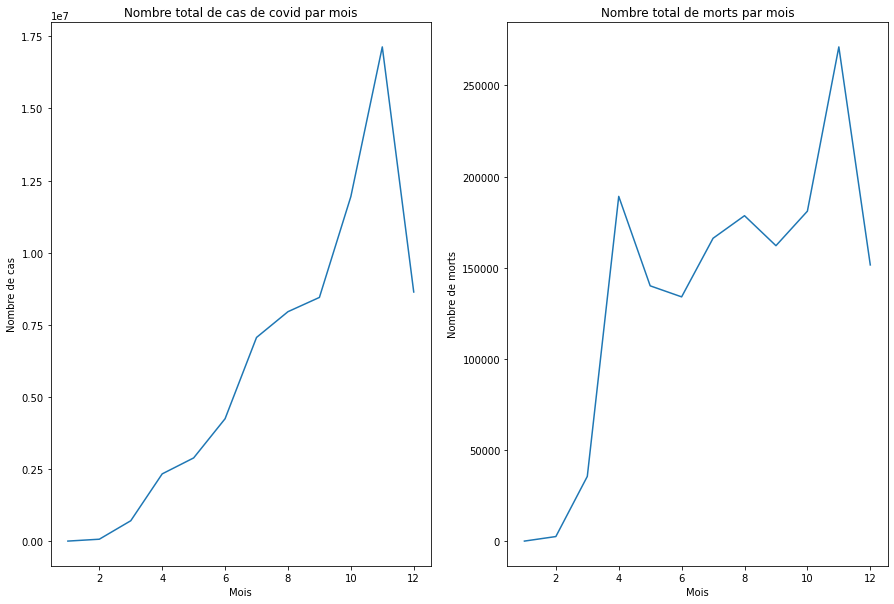

In [ ]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_clean_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas")
df_clean_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts")

On remarque que de facon globale le confinement en début Novembre en 2020 a réduit le nombre de cas de covid ainsi que le taux de mortalité liés au covid

Situation par continent ?

Ici nous allons groupé par continent et voir le nombre de cas et de décès liés au covid

In [ ]:
df_clean

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
2020-04-06,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796


In [ ]:
df_clean.columns

Index(['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories',
       'geoId', 'countryterritoryCode', 'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [ ]:
df_clean['continentExp']

dateRep
2020-12-14      Asia
2020-12-13      Asia
2020-12-12      Asia
2020-12-11      Asia
2020-12-10      Asia
               ...  
2020-04-07    Africa
2020-04-06    Africa
2020-04-05    Africa
2020-04-04    Africa
2020-04-03    Africa
Name: continentExp, Length: 58759, dtype: object

In [ ]:
df_clean_by_continent=df_clean.groupby('continentExp')['cases', 'deaths'].sum().sort_values('cases',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean_by_continent

,cases,deaths
continentExp,,
America,30884895,785370
Europe,21395058,479706
Asia,16780431,290097
Africa,2361775,56134
Oceania,53298,1151


In [ ]:
df_clean.groupby('continentExp')['cases', 'deaths'].sum().sort_values('deaths',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
continentExp,,
America,30884895,785370
Europe,21395058,479706
Asia,16780431,290097
Africa,2361775,56134
Oceania,53298,1151
